# Caso práctico: Árboles de decisión

En este caso de uso práctico se pretende predecir el exito laboral de los egresados en la Universidad Continental

## Importación de librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. Lectura de datos

In [3]:
df = pd.read_csv('./data_egresado.csv')

### 2. Visualización del conjunto de datos

In [4]:
df.head(5)

,Nombres,Apellidos,Carrera,Educacion,Experiencia,Puestos Anteriores,Habilidades Tecnicas,Habilidades Blandas,Logros Academicos,Edad,Idiomas,Estado Laboral,Exito Laboral
0,Lauren,Diaz,Ingeniería Ambiental,0,3,3,9,0,4,26,3,1,0
1,Alan,Wilson,Ingeniería Ambiental,0,2,2,9,1,0,26,2,1,0
2,David,Burgess,Ingeniería de Sistemas,3,0,0,2,4,2,25,0,2,0
3,Megan,Hutchinson,Enfermería,1,5,1,9,0,4,22,5,0,0
4,James,Nguyen,Enfermería,3,5,3,6,3,1,26,5,0,0


In [5]:
# Información del dataframe o conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nombres               50000 non-null  object
 1   Apellidos             50000 non-null  object
 2   Carrera               50000 non-null  object
 3   Educacion             50000 non-null  int64 
 4   Experiencia           50000 non-null  int64 
 5   Puestos Anteriores    50000 non-null  int64 
 6   Habilidades Tecnicas  50000 non-null  int64 
 7   Habilidades Blandas   50000 non-null  int64 
 8   Logros Academicos     50000 non-null  int64 
 9   Edad                  50000 non-null  int64 
 10  Idiomas               50000 non-null  int64 
 11  Estado Laboral        50000 non-null  int64 
 12  Exito Laboral         50000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 5.0+ MB


### 3. Codificando variables categoricas

In [6]:
label_encoders = {}
categorical_cols = ['Carrera', 'Educacion', 'Habilidades Blandas', 'Logros Academicos', 'Estado Laboral']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Dividimos los datos en caracteristicas
X = df.drop(columns=['Exito Laboral', 'Nombres', 'Apellidos'])
y = df['Exito Laboral']

### 4. División de los datos en conjunto de entramiento y prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Entrenamiento del arbol de decisión

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

### 6. Calculo de la precisión del modelo

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 49.99%


### 7. Matriz de confusión

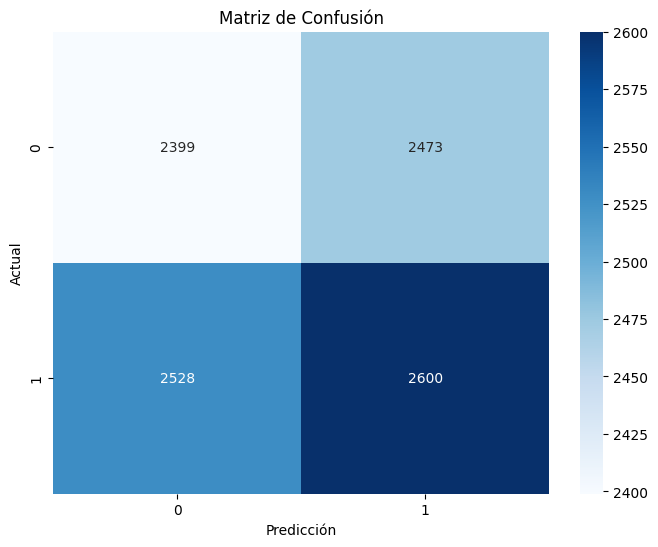

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicción']), annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()